# Exploratory Data Analysis (EDA) 

#### Cleaning Data 

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv('lebron_career.csv')

In [3]:
df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,2003-10-29,18-303,CLE,SAC,L (-14),42:00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18-304,CLE,PHO,L (-9),41:00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18-306,CLE,POR,L (-19),39:00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18-310,CLE,DEN,L (-4),41:00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18-312,CLE,IND,L (-1),44:00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7


In [4]:
df.shape

(1132, 26)

In [5]:
df.drop('game', axis=1)
df.date=pd.to_datetime(df['date'])
df['mp'] = df['mp'].astype(str)
df['mp'] = df['mp'].str.replace(':','.')
df['mp'] = df['mp'].astype(float)
df['age'] = df['age'].astype(str)
df['age'] = df['age'].str.replace('-','.')
df['age'] = df['age'].astype(float)
df['result'] = df['result'].str[:1]

In [6]:
df.rename(columns={'minus_plus': 'plus_minus'}, inplace=True)


In [7]:
df.fillna(value=0)

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,plus_minus
0,1,2003-10-29,18.303,CLE,SAC,L,42.00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9
1,2,2003-10-30,18.304,CLE,PHO,L,41.00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3
2,3,2003-11-01,18.306,CLE,POR,L,39.00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21
3,4,2003-11-05,18.310,CLE,DEN,L,41.00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3
4,5,2003-11-07,18.312,CLE,IND,L,44.00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7
5,6,2003-11-08,18.313,CLE,WAS,W,45.00,8,19,0.421,...,5,3,8,9,1,1,2,17,15.7,14
6,7,2003-11-10,18.315,CLE,NYK,W,34.00,7,12,0.583,...,1,4,5,4,1,1,2,17,15.8,20
7,8,2003-11-12,18.317,CLE,MIA,L,42.00,6,15,0.400,...,1,2,3,7,2,1,4,18,12.8,-4
8,9,2003-11-14,18.319,CLE,BOS,L,35.00,3,12,0.250,...,1,4,5,3,0,0,4,10,0.8,-1
9,10,2003-11-15,18.320,CLE,PHI,W,47.00,10,19,0.526,...,0,5,5,8,1,2,5,22,15.6,8


#### Creating X feat and y 

In [8]:
x_feats = ['age', 'mp', 'fgp', 'threep', 'ftp', 'fta', 'team', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus']
X = pd.get_dummies(df[x_feats], drop_first=True)
# y= df.result

X.head() 

,age,mp,fgp,threep,ftp,fta,trb,ast,stl,blk,tov,pts,game_score,plus_minus,team_MIA
0,18.303,42.0,0.600,0.0,0.333,3,6,9,4,0,2,25,24.7,-9,0
1,18.304,41.0,0.471,0.2,0.571,7,12,8,1,0,7,21,14.7,-3,0
2,18.306,39.0,0.250,0.0,1.000,2,4,6,2,0,2,8,5.0,-21,0
3,18.310,41.0,0.273,0.0,1.000,1,11,7,2,3,2,7,11.2,-3,0
4,18.312,44.0,0.444,0.5,0.857,7,5,3,0,0,7,23,9.0,-7,0


In [9]:
y= pd.get_dummies(df['result'], drop_first=True)

In [10]:
y['W'] = y['W'].astype(int)

In [11]:
df.to_csv('final_lebron.csv')

### Creating Visualizations for EDA 

<function matplotlib.pyplot.show(*args, **kw)>

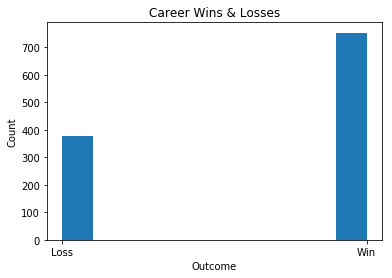

In [36]:
ys=[0,1]
labels=["Loss", "Win"]
y.hist()
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Career Wins & Losses')
plt.xticks(ys, labels)
plt.grid(b=None)
plt.show

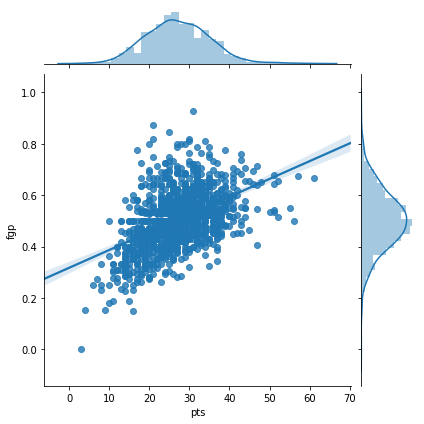

In [37]:
sns.jointplot("pts", "fgp", data=df, kind='reg');


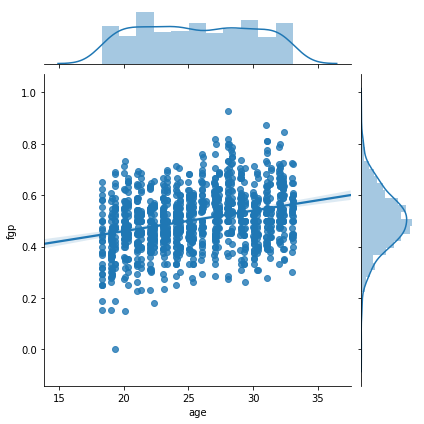

In [38]:
sns.jointplot("age", 'fgp', data=df, kind='reg');



In [39]:
group2=df.groupby(['result']).sum()

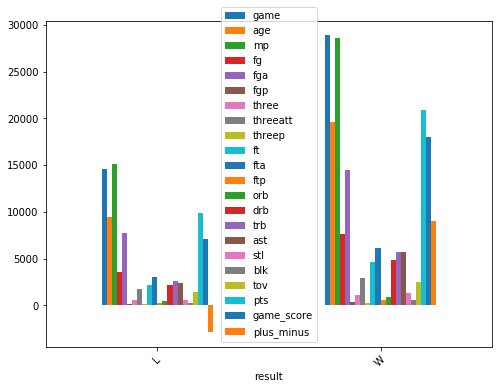

In [40]:
group2.plot(kind='bar', stacked=None, figsize=(8,6))
plt.legend(loc=0)
plt.xticks(rotation=45)
plt.show();

In [42]:
graph_feats2 = ['age', 'team', 'opp', 'result', 'mp', 'fg', 'fga',
       'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus']
graphinglast =pd.get_dummies(df[graph_feats2], drop_first=False)
# y= df.result

graphinglast.head() 

,age,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_PHO,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,result_L,result_W
0,18.303,42.0,12,20,0.600,0,2,0.0,1,3,...,0,0,1,0,0,0,0,0,1,0
1,18.304,41.0,8,17,0.471,1,5,0.2,4,7,...,1,0,0,0,0,0,0,0,1,0
2,18.306,39.0,3,12,0.250,0,1,0.0,2,2,...,0,1,0,0,0,0,0,0,1,0
3,18.310,41.0,3,11,0.273,0,2,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,18.312,44.0,8,18,0.444,1,2,0.5,6,7,...,0,0,0,0,0,0,0,0,1,0


In [43]:
graphingtotal=graphinglast.groupby('result_L').sum()

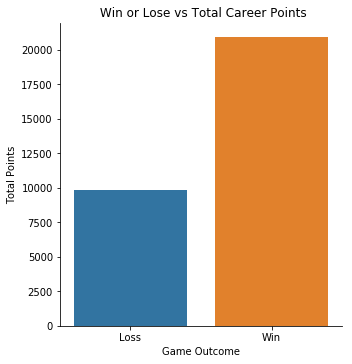

In [44]:
g=sns.catplot(x="result_W", y='pts', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Total Career Points")
plt.ylabel("Total Points")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

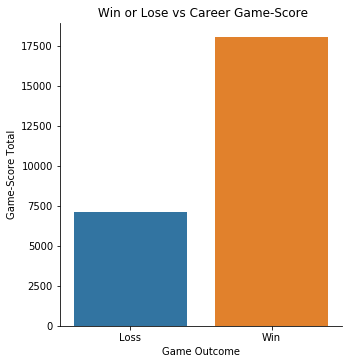

In [45]:
g=sns.catplot(x="result_W", y='game_score', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Game-Score")
plt.ylabel("Game-Score Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

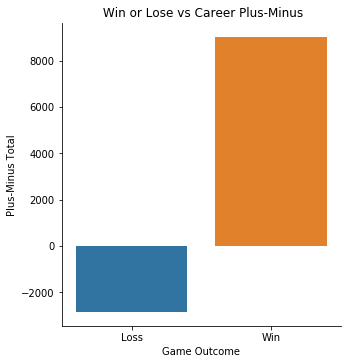

In [47]:
g=sns.catplot(x="result_W", y='plus_minus', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Plus-Minus")
plt.ylabel("Plus-Minus Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

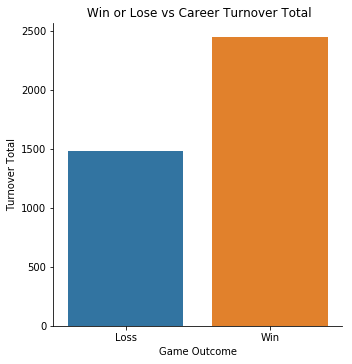

In [48]:
g=sns.catplot(x="result_W", y='tov', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Turnover Total")
plt.ylabel("Turnover Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

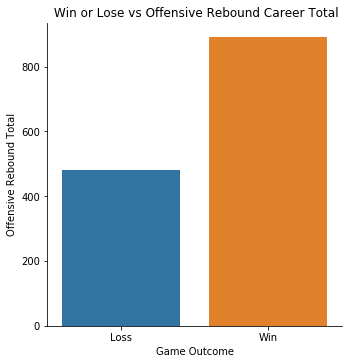

In [49]:
g=sns.catplot(x="result_W", y='orb', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Offensive Rebound Career Total")
plt.ylabel("Offensive Rebound Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

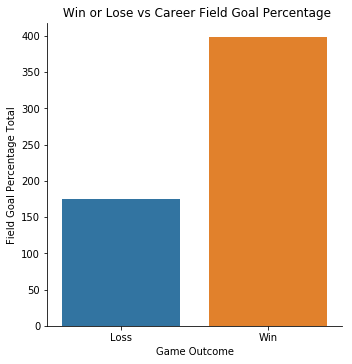

In [50]:
g=sns.catplot(x="result_W", y='fgp', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Field Goal Percentage")
plt.ylabel("Field Goal Percentage Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

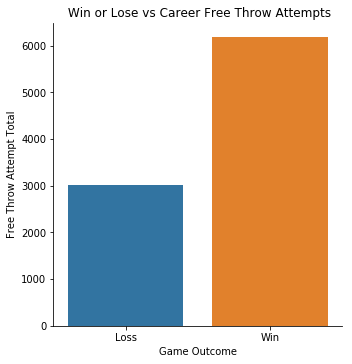

In [51]:
g=sns.catplot(x="result_W", y='fta', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career Free Throw Attempts")
plt.ylabel("Free Throw Attempt Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

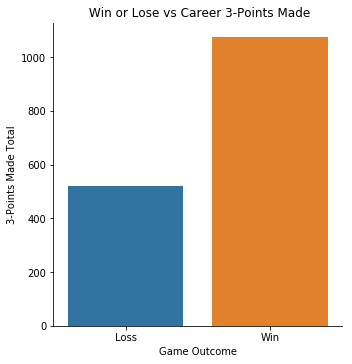

In [52]:
g=sns.catplot(x="result_W", y='three', kind='bar',data=graphingtotal)
plt.title(" Win or Lose vs Career 3-Points Made")
plt.ylabel("3-Points Made Total")
plt.xlabel("Game Outcome")
g.set(xticklabels=["Loss", "Win"])

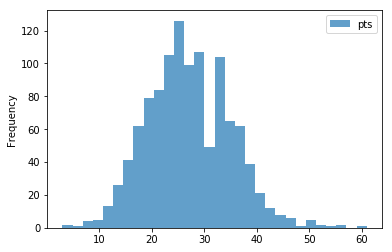

In [61]:
df.plot.hist(y=['pts'], bins=30, alpha=0.7)